#REGRESSION

In [ ]:
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-28mdt8jh
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-28mdt8jh
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0945a448704b25a0897ed24abd45ab4d0b0d6f3c2_-cp36-none-any.whl size=144533 sha256=86e8afac41cac8c8e32cfbf71d2beb52874ba0f790871aa12d719688bb6bdeef
  Stored in directory: /tmp/pip-ephem-wheel-cache-kjbhwwa5/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [ ]:
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


data clean

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset=dataset.dropna()

The "Origin" column is really categorical, not numeric. So convert that to a one-hot:

In [ ]:
dataset['Origin']=dataset['Origin'].map({1:'USA', 2:'Europe',3:'Japan'})

In [ ]:
dataset=pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Split data

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Inspect data

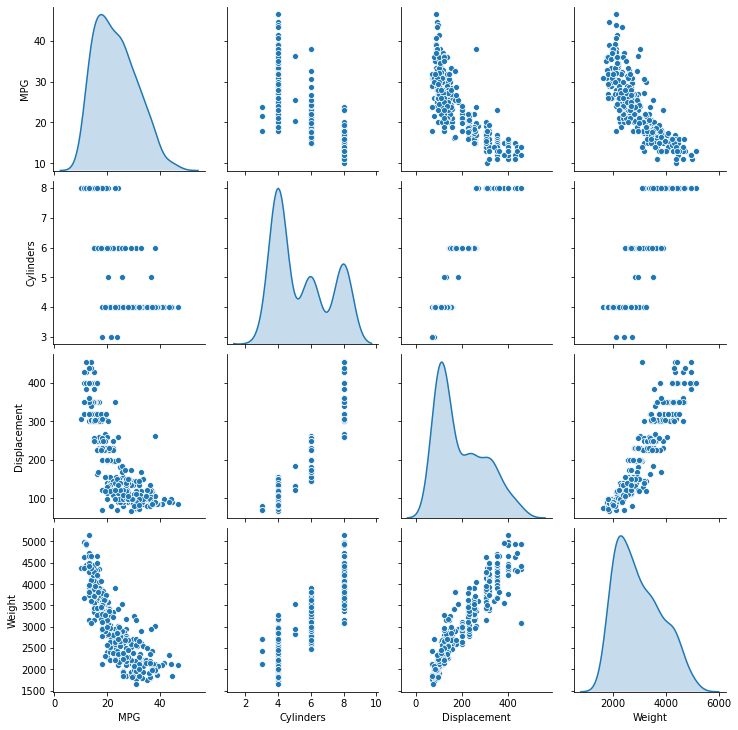

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


Split features from labels

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

Normalize

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Build model

9 features in our model

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.46448013],
       [-0.22953534],
       [-0.18770766],
       [-0.42815495],
       [ 0.11493084],
       [-0.1710785 ],
       [ 0.07639936],
       [ 0.13603315],
       [-0.28665447],
       [-0.10694999]], dtype=float32)

Train model

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch%100==0: print(' ')
    print(',', ends=' ')


EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:579.6849,  mae:22.8160,  mse:579.6849,  val_loss:571.4529,  val_mae:22.6371,  val_mse:571.4529,  
....................................................................................................
Epoch: 100, loss:5.9389,  mae:1.7059,  mse:5.9389,  val_loss:8.2329,  val_mae:2.2050,  val_mse:8.2329,  
....................................................................................................
Epoch: 200, loss:4.9758,  mae:1.5304,  mse:4.9758,  val_loss:7.8409,  val_mae:2.1197,  val_mse:7.8409,  
....................................................................................................
Epoch: 300, loss:4.6138,  mae:1.4674,  mse:4.6138,  val_loss:8.3416,  val_mae:2.2237,  val_mse:8.3416,  
....................................................................................................
Epoch: 400, loss:4.0369,  mae:1.3528,  mse:4.0369,  val_loss:8.4585,  val_mae:2.2295,  val_mse:8.4585,  
..............................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.514728,1.004953,2.514728,10.554772,2.409457,10.554772,995
996,2.351870,0.970911,2.351870,10.985990,2.421921,10.985990,996
997,2.517979,1.017429,2.517979,10.708511,2.455374,10.708511,997
998,2.403161,1.011988,2.403161,11.144231,2.441942,11.144231,998
999,2.390182,1.026030,2.390182,10.743784,2.460058,10.743784,999


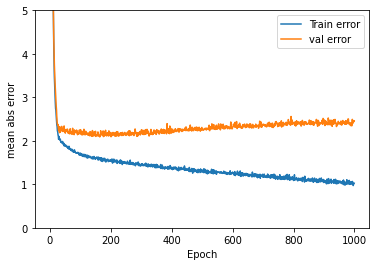

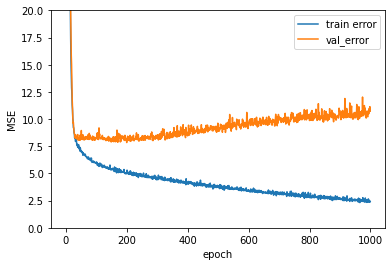

In [ ]:
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']= history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('mean abs error')
  plt.plot(hist['epoch'], hist['mae'], label='Train error')
  plt.plot(hist['epoch'], hist['val_mae'], label='val error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel("MSE")
  plt.plot(hist['epoch'], hist['mse'], label='train error')
  plt.plot(hist['epoch'], hist['val_mse'],label='val_error')
  plt.legend()
  plt.ylim([0,20])
  plt.show()

plot_history(history)  

seems overfitting lets use early stopping callback

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:549.4507,  mae:22.0476,  mse:549.4507,  val_loss:540.1712,  val_mae:21.7689,  val_mse:540.1712,  
..................................................................

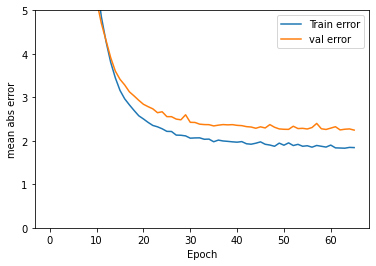

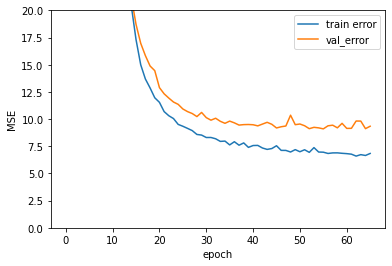

In [ ]:
plot_history(early_history)

predict

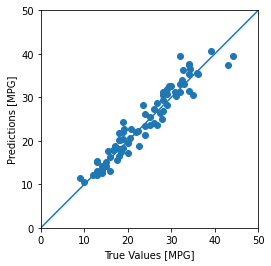

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

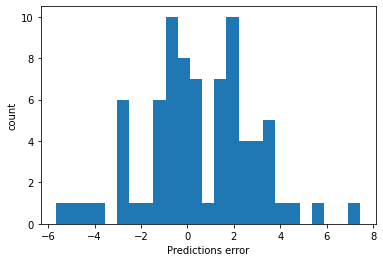

In [ ]:
error=test_predictions- test_labels
plt.hist(error, bins=25)
plt.xlabel('Predictions error')
_=plt.ylabel('count')

#working with structured data

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
import pathlib

dataset_url = 'http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip'
csv_file = 'datasets/petfinder-mini/petfinder-mini.csv'

In [ ]:
tf.keras.utils.get_file('petfinder_mini.zip', dataset_url,
                        extract=True, cache_dir='.')
dataframe = pd.read_csv(csv_file)

In [ ]:
dataframe.head()

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2


target variable

The task in the original dataset is to predict the speed at which a pet will be adopted (e.g., in the first week, the first month, the first three months, and so on).

In [ ]:
dataframe['AdoptionSpeed'].unique()

array([2, 0, 3, 1, 4])

In [ ]:
dataframe['target']=np.where(dataframe['AdoptionSpeed']==4, 0, 1)

In [ ]:
#drop unused columns from dataframe
dataframe=dataframe.drop(columns=['AdoptionSpeed', 'Description'])

Split the data

In [ ]:
train, test= train_test_split(dataframe, test_size=0.2)
train, val= train_test_split(train, test_size=0.2)
print(len(train), ' train examples')
print(len(val), 'val examples')
print(len(test), ' testexamples')

7383  train examples
1846 val examples
2308  testexamples


Create an input pipeline using tf.data

This will enable us to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model.

1. copy the input dataframe
2. pop the label column from datframe
3. create datset from tensor slices, coz tensor slices are created by obtaining dictionary representations of the dataframe and label column
4. shuffle dataset if needed
5. get a batch of tensors of specified size

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

Now that we have created the input pipeline, let's call it to see the format of the data it returns. We have used a small batch size to keep the output readable.

In [ ]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of ages:', feature_batch['Age'])
  print('A batch of targets:', label_batch )

Every feature: ['Type', 'Age', 'Breed1', 'Gender', 'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'Fee', 'PhotoAmt']
A batch of ages: tf.Tensor([ 3 26  8  3  2], shape=(5,), dtype=int64)
A batch of targets: tf.Tensor([1 0 0 1 1], shape=(5,), dtype=int64)


In [ ]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [ ]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

numeric column

In [ ]:
photo_count = feature_column.numeric_column('PhotoAmt')
demo(photo_count)

[[3.]
 [2.]
 [1.]
 [2.]
 [3.]]


Bucketized columns

Often, you don't want to feed a number directly into the model, but instead split its value into different categories based on numerical ranges. Consider raw data that represents a person's age. Instead of representing age as a numeric column, we could split the age into several buckets using a bucketized column. 

In [ ]:
age = feature_column.numeric_column('Age')
age_buckets = feature_column.bucketized_column(age, boundaries=[1, 3, 5])
demo(age_buckets)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Categorical columns

In [ ]:
animal_type = feature_column.categorical_column_with_vocabulary_list(
      'Type', ['Cat', 'Dog'])

animal_type_one_hot = feature_column.indicator_column(animal_type)
demo(animal_type_one_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


Embedding columns

Suppose instead of having just a few possible strings, we have thousands (or more) values per category. For a number of reasons, as the number of categories grow large, it becomes infeasible to train a neural network using one-hot encodings. We can use an embedding column to overcome this limitation. 

In [ ]:
breed1 = feature_column.categorical_column_with_vocabulary_list(
      'Breed1', dataframe.Breed1.unique())
breed1_embedding = feature_column.embedding_column(breed1, dimension=8)
demo(breed1_embedding)

[[ 0.5283377   0.28634608  0.64237344 -0.03743796 -0.41976145 -0.32661238
  -0.33388907 -0.48248443]
 [ 0.5283377   0.28634608  0.64237344 -0.03743796 -0.41976145 -0.32661238
  -0.33388907 -0.48248443]
 [ 0.5283377   0.28634608  0.64237344 -0.03743796 -0.41976145 -0.32661238
  -0.33388907 -0.48248443]
 [ 0.48260015 -0.08149811  0.12157942  0.25014433  0.09213525 -0.05693761
   0.24609175  0.04758761]
 [ 0.5283377   0.28634608  0.64237344 -0.03743796 -0.41976145 -0.32661238
  -0.33388907 -0.48248443]]


Crossed feature columns


Combining features into a single feature, better known as feature crosses, enables a model to learn separate weights for each combination of features. 

In [ ]:
crossed_feature = feature_column.crossed_column([age_buckets, animal_type], hash_bucket_size=10)
demo(feature_column.indicator_column(crossed_feature))

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Lets work on columns

In [ ]:
feature_columns = []

1. numeric columns

In [ ]:

# numeric cols
for header in ['PhotoAmt', 'Fee', 'Age']:
  feature_columns.append(feature_column.numeric_column(header))

2. buketized columns

In [ ]:
age=feature_column.numeric_column('Age')
age_buckets = feature_column.bucketized_column(age, boundaries=[1, 2, 3, 4, 5])
feature_columns.append(age_buckets)

3. categorical

In [ ]:
indicator_column_names = ['Type', 'Color1', 'Color2', 'Gender', 'MaturitySize',
                          'FurLength', 'Vaccinated', 'Sterilized', 'Health']
for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, dataframe[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

4. embedding columns

In [ ]:
breed1 = feature_column.categorical_column_with_vocabulary_list(
      'Breed1', dataframe.Breed1.unique())
breed1_embedding = feature_column.embedding_column(breed1, dimension=8)
feature_columns.append(breed1_embedding)

5. crossed columns

In [ ]:
age_type_feature = feature_column.crossed_column([age_buckets, animal_type], hash_bucket_size=100)
feature_columns.append(feature_column.indicator_column(age_type_feature))

feature layer

use a DenseFeatures layer to input them to our Keras model.


In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

used a small batch size to demonstrate how feature columns worked. We create a new input pipeline with a larger batch size.

In [ ]:
batch_size=32
train_ds=df_to_dataset(train, batch_size=batch_size)
val_ds= df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds=df_to_dataset(test, shuffle=False, batch_size=batch_size)

model create and train

In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
225/231 [============================>.] - ETA: 0s - loss: 0.6537 - accuracy: 0.6982WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'Type': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=string>, 'Age': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'Breed1': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'Gender': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=string>, 'Color1': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=string>, 'Color2': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=string>, 'MaturitySize': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=string>, 'FurLength': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=string>, 'Vaccinated': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=string>, 'Sterilized': <tf.Tensor 'ExpandDims_10

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

73/73 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7396
Accuracy 0.7396013736724854


In [1]:
import numpy as np

import tensorflow as tf

In [2]:
!pip install tensorflow-hub
!pip install tensorflow-datasets
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.3.0
Eager mode:  True
Hub version:  0.9.0
GPU is NOT AVAILABLE


In [3]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDMSRKJ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDMSRKJ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDMSRKJ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [7]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [8]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

build model

0- negative
1-positive

 Keras layer that uses a TensorFlow Hub model to embed the sentences,

Note that no matter the length of the input text, the output shape of the embeddings is: (num_examples, embedding_dimension).

In [9]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

full model

In [10]:
model=tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


Loss function and optimizer

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

train

Train the model for 20 epochs in mini-batches of 512 samples. This is 20 iterations over all samples in the x_train and y_train tensors

In [13]:
history=model.fit(train_data.shuffle(10000).batch(512),epochs=20,
                  validation_data=validation_data.batch(512), verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 102ms/step - loss: 1.2159 - accuracy: 0.4957 - val_loss: 0.8214 - val_accuracy: 0.5080
Epoch 2/20
30/30 [==============================] - 3s 96ms/step - loss: 0.7433 - accuracy: 0.5378 - val_loss: 0.6924 - val_accuracy: 0.5714
Epoch 3/20
30/30 [==============================] - 3s 96ms/step - loss: 0.6731 - accuracy: 0.5899 - val_loss: 0.6521 - val_accuracy: 0.6057
Epoch 4/20
30/30 [==============================] - 3s 92ms/step - loss: 0.6362 - accuracy: 0.6213 - val_loss: 0.6233 - val_accuracy: 0.6322
Epoch 5/20
30/30 [==============================] - 3s 93ms/step - loss: 0.6068 - accuracy: 0.6466 - val_loss: 0.5985 - val_accuracy: 0.6549
Epoch 6/20
30/30 [==============================] - 3s 94ms/step - loss: 0.5798 - accuracy: 0.6690 - val_loss: 0.5751 - val_accuracy: 0.6758
Epoch 7/20
30/30 [==============================] - 3s 92ms/step - loss: 0.5529 - accuracy: 0.6955 - val_loss: 0.5518 - val_accuracy: 0.7009
Epoch 8/20
3

evaluate model

In [15]:
results=model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 3s - loss: 0.3343 - accuracy: 0.8453
loss: 0.334
accuracy: 0.845


Overfitting and underfitting

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

IMDB dataset

multi_hot_sequences turns words into vectors as 0 or 1 in 10000 dimensional vector space

In [26]:
from tensorflow import keras

import pathlib
import shutil
import tempfile

In [32]:
NUM_WORDS=10000
(train_data, train_labels), (test_data, test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)
def multi_hot_sequences(sequences, dimension):
  #create an all-zero matrix of shape (len(sequences), dimension)
  results=np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices]=1.0 
  return results 
train_data=multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data, dimension=NUM_WORDS) 


In [34]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

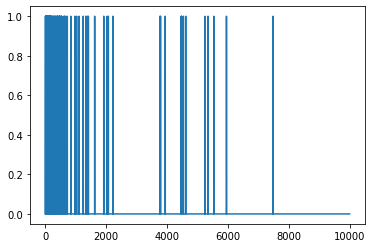

In [33]:
plt.plot(train_data[0])

Overfitting

In [35]:
baseline_model=keras.Sequential([
                                 keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
                                 keras.layers.Dense(16, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')

])

In [36]:
baseline_model.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

In [42]:
baseline_history=baseline_model.fit(train_data, 
                                    train_labels, 
                                    epochs=20, 
                                    batch_size=512, 
                                    validation_data=(test_data, test_labels), 
                                    verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4607 - accuracy: 0.8166 - binary_crossentropy: 0.4607 - val_loss: 0.3250 - val_accuracy: 0.8776 - val_binary_crossentropy: 0.3250
Epoch 2/20
49/49 - 2s - loss: 0.2415 - accuracy: 0.9140 - binary_crossentropy: 0.2415 - val_loss: 0.2840 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2840
Epoch 3/20
49/49 - 2s - loss: 0.1807 - accuracy: 0.9359 - binary_crossentropy: 0.1807 - val_loss: 0.2897 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2897
Epoch 4/20
49/49 - 2s - loss: 0.1446 - accuracy: 0.9509 - binary_crossentropy: 0.1446 - val_loss: 0.3105 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.3105
Epoch 5/20
49/49 - 2s - loss: 0.1179 - accuracy: 0.9618 - binary_crossentropy: 0.1179 - val_loss: 0.3412 - val_accuracy: 0.8735 - val_binary_crossentropy: 0.3412
Epoch 6/20
49/49 - 2s - loss: 0.0959 - accuracy: 0.9705 - binary_crossentropy: 0.0959 - val_loss: 0.3755 - val_accuracy: 0.8689 - val_binary_crossentropy: 0.3755
Epoch 7/20
49/49 - 2s - loss

working well with training accuracy but not with validation accuracy

create a small model, lets use 4 units

In [43]:
small_model=keras.Sequential([
                                 keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
                                 keras.layers.Dense(4, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')

])

In [44]:
  small_model.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

In [46]:
small_history=small_model.fit(train_data, 
                                    train_labels, 
                                    epochs=20, 
                                    batch_size=512, 
                                    validation_data=(test_data, test_labels), 
                                    verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5532 - accuracy: 0.7513 - binary_crossentropy: 0.5532 - val_loss: 0.4079 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.4079
Epoch 2/20
49/49 - 1s - loss: 0.3116 - accuracy: 0.8971 - binary_crossentropy: 0.3116 - val_loss: 0.3134 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.3134
Epoch 3/20
49/49 - 2s - loss: 0.2328 - accuracy: 0.9220 - binary_crossentropy: 0.2328 - val_loss: 0.2890 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2890
Epoch 4/20
49/49 - 2s - loss: 0.1926 - accuracy: 0.9362 - binary_crossentropy: 0.1926 - val_loss: 0.2866 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2866
Epoch 5/20
49/49 - 2s - loss: 0.1661 - accuracy: 0.9452 - binary_crossentropy: 0.1661 - val_loss: 0.2942 - val_accuracy: 0.8817 - val_binary_crossentropy: 0.2942
Epoch 6/20
49/49 - 2s - loss: 0.1457 - accuracy: 0.9534 - binary_crossentropy: 0.1457 - val_loss: 0.2977 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.2977
Epoch 7/20
49/49 - 2s - loss

working well with training accuracy but not with validation accuracy, 3rd epoch overfitting

create bigger model with high units, like 512

In [47]:
big_model=keras.Sequential([
                                 keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
                                 keras.layers.Dense(512, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')

])

In [48]:
big_model.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

In [49]:
big_history=big_model.fit(train_data, 
                                    train_labels, 
                                    epochs=20, 
                                    batch_size=512, 
                                    validation_data=(test_data, test_labels), 
                                    verbose=2)

Epoch 1/20
49/49 - 15s - loss: 0.3640 - accuracy: 0.8371 - binary_crossentropy: 0.3640 - val_loss: 0.2849 - val_accuracy: 0.8820 - val_binary_crossentropy: 0.2849
Epoch 2/20
49/49 - 15s - loss: 0.1435 - accuracy: 0.9483 - binary_crossentropy: 0.1435 - val_loss: 0.3139 - val_accuracy: 0.8751 - val_binary_crossentropy: 0.3139
Epoch 3/20
49/49 - 14s - loss: 0.0485 - accuracy: 0.9860 - binary_crossentropy: 0.0485 - val_loss: 0.4403 - val_accuracy: 0.8702 - val_binary_crossentropy: 0.4403
Epoch 4/20
49/49 - 15s - loss: 0.0067 - accuracy: 0.9988 - binary_crossentropy: 0.0067 - val_loss: 0.5649 - val_accuracy: 0.8677 - val_binary_crossentropy: 0.5649
Epoch 5/20
49/49 - 14s - loss: 7.8720e-04 - accuracy: 1.0000 - binary_crossentropy: 7.8720e-04 - val_loss: 0.6800 - val_accuracy: 0.8709 - val_binary_crossentropy: 0.6800
Epoch 6/20
49/49 - 14s - loss: 2.2523e-04 - accuracy: 1.0000 - binary_crossentropy: 2.2523e-04 - val_loss: 0.7262 - val_accuracy: 0.8716 - val_binary_crossentropy: 0.7262
Epoch 

train loss is small but validation loss in high, its overfitting fast

size of model with overfitting

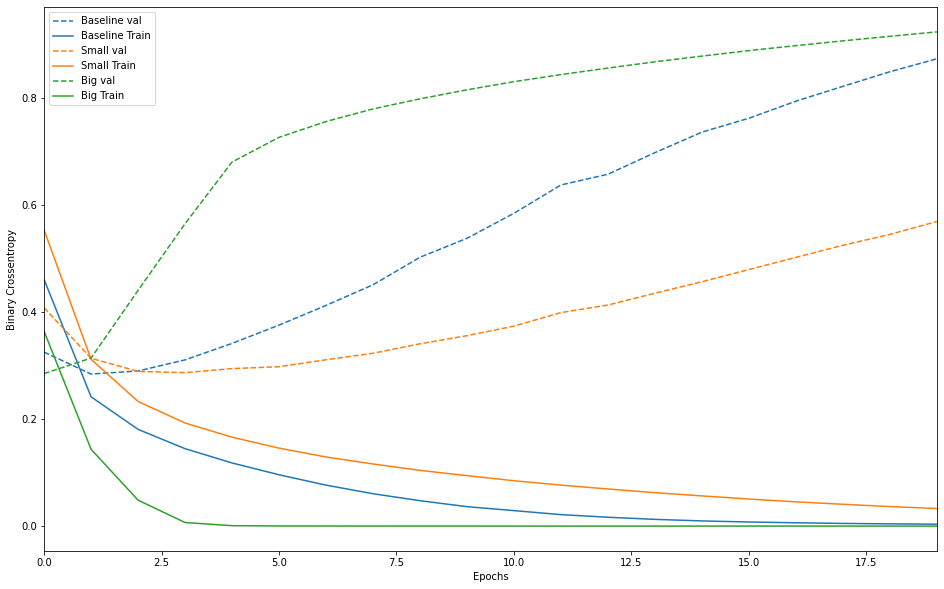

In [52]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val=plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_', ' ').title())
  plt.legend()
  plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('small', small_history),
              ('big', big_history)])     

L1 reg and l2 reg

In [61]:
l2_model=keras.models.Sequential([
                                  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS, )),
                                  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
                                  keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
l2_model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [64]:
l2_model_history=l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5327 - accuracy: 0.8150 - binary_crossentropy: 0.4916 - val_loss: 0.3988 - val_accuracy: 0.8731 - val_binary_crossentropy: 0.3556
Epoch 2/20
49/49 - 2s - loss: 0.3212 - accuracy: 0.9039 - binary_crossentropy: 0.2734 - val_loss: 0.3410 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2896
Epoch 3/20
49/49 - 2s - loss: 0.2691 - accuracy: 0.9246 - binary_crossentropy: 0.2149 - val_loss: 0.3442 - val_accuracy: 0.8829 - val_binary_crossentropy: 0.2885
Epoch 4/20
49/49 - 2s - loss: 0.2459 - accuracy: 0.9331 - binary_crossentropy: 0.1885 - val_loss: 0.3456 - val_accuracy: 0.8838 - val_binary_crossentropy: 0.2872
Epoch 5/20
49/49 - 2s - loss: 0.2287 - accuracy: 0.9417 - binary_crossentropy: 0.1696 - val_loss: 0.3562 - val_accuracy: 0.8808 - val_binary_crossentropy: 0.2968
Epoch 6/20
49/49 - 2s - loss: 0.2181 - accuracy: 0.9467 - binary_crossentropy: 0.1579 - val_loss: 0.3647 - val_accuracy: 0.8783 - val_binary_crossentropy: 0.3042
Epoch 7/20
49/49 - 2s - loss

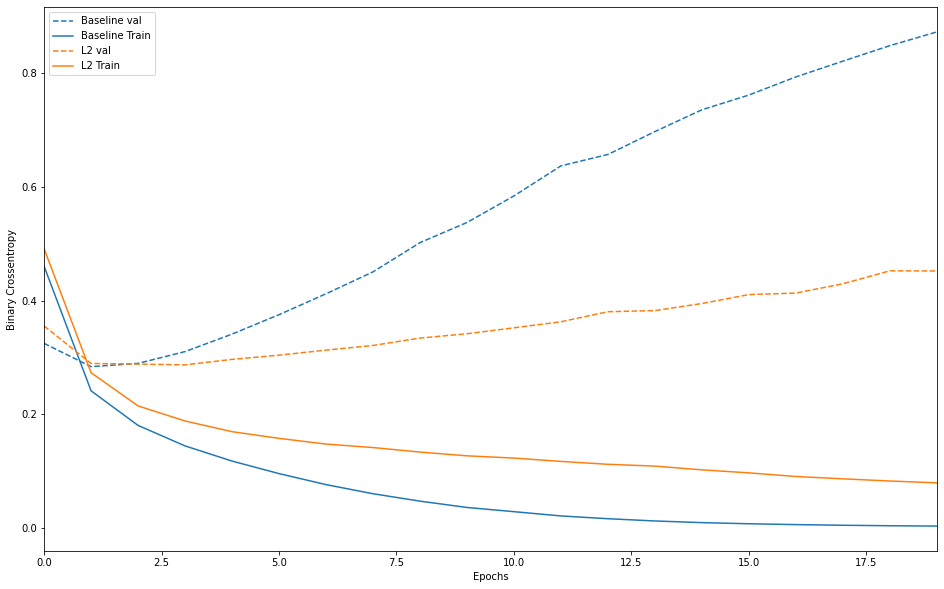

In [65]:
plot_history([('baseline', baseline_history),
              ('l2',l2_model_history)])

dropouts

never drop in test data

In [66]:
dpt_model=keras.models.Sequential([
                                 keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(16, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(1, activation='sigmoid')

])

In [67]:
dpt_model.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

In [68]:
dpt_history=dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6509 - accuracy: 0.6291 - binary_crossentropy: 0.6509 - val_loss: 0.5812 - val_accuracy: 0.7770 - val_binary_crossentropy: 0.5812
Epoch 2/20
49/49 - 2s - loss: 0.5314 - accuracy: 0.8039 - binary_crossentropy: 0.5314 - val_loss: 0.4535 - val_accuracy: 0.8624 - val_binary_crossentropy: 0.4535
Epoch 3/20
49/49 - 2s - loss: 0.4314 - accuracy: 0.8658 - binary_crossentropy: 0.4314 - val_loss: 0.3641 - val_accuracy: 0.8844 - val_binary_crossentropy: 0.3641
Epoch 4/20
49/49 - 2s - loss: 0.3576 - accuracy: 0.8920 - binary_crossentropy: 0.3576 - val_loss: 0.3209 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.3209
Epoch 5/20
49/49 - 2s - loss: 0.3074 - accuracy: 0.9085 - binary_crossentropy: 0.3074 - val_loss: 0.3052 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.3052
Epoch 6/20
49/49 - 2s - loss: 0.2742 - accuracy: 0.9182 - binary_crossentropy: 0.2742 - val_loss: 0.3055 - val_accuracy: 0.8854 - val_binary_crossentropy: 0.3055
Epoch 7/20
49/49 - 2s - loss

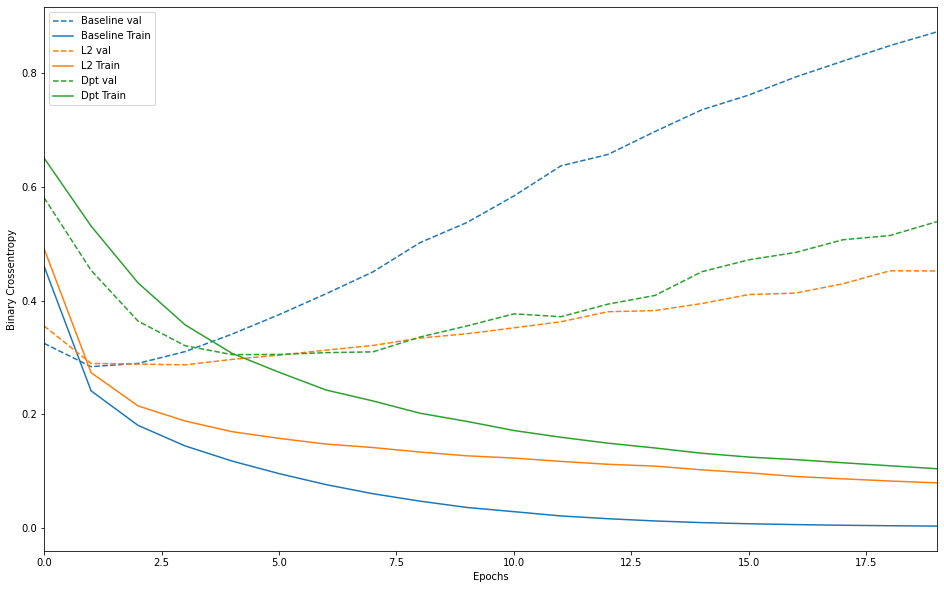

In [69]:
plot_history([('baseline', baseline_history),
              ('l2',l2_model_history),
              ('dpt', dpt_history)])